In [60]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [61]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)


In [62]:
class Graphmodule(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten=nn.Flatten()
        self.linear_relu_stack=nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )
    def forword(self,x):
        x=self.flatten(x)
        logits=self.linear_relu_stack(x)
        return logits
    def backword(self,x):
        pass
Huge_Tensor=Graphmodule().to('cuda')
loss_fn=nn.CrossEntropyLoss()
opim=torch.optim.SGD(Huge_Tensor.parameters,lr=1e-5)
def training_loop():
    pass

TypeError: 'method' object is not iterable

In [ ]:
x = torch.tensor([
    [1],
    [2],
    [3],
    [4],
    [5],
    [6]
],dtype=torch.float32) # input tensor
y = torch.tensor([
    [2],
    [4],
    [6],
    [8],
    [10],
    [12]
],dtype=torch.float32)  # expected output
w = torch.randn(1,1,dtype=torch.float32,requires_grad=True)
# b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)


In [ ]:
# with torch.no_grad():
#     loss.backward()
print(z)
print(w.grad)


tensor([[0.8916],
        [1.7831],
        [2.6747],
        [3.5663],
        [4.4579],
        [5.3494]], grad_fn=<MmBackward0>)
tensor([[-26.9946]])


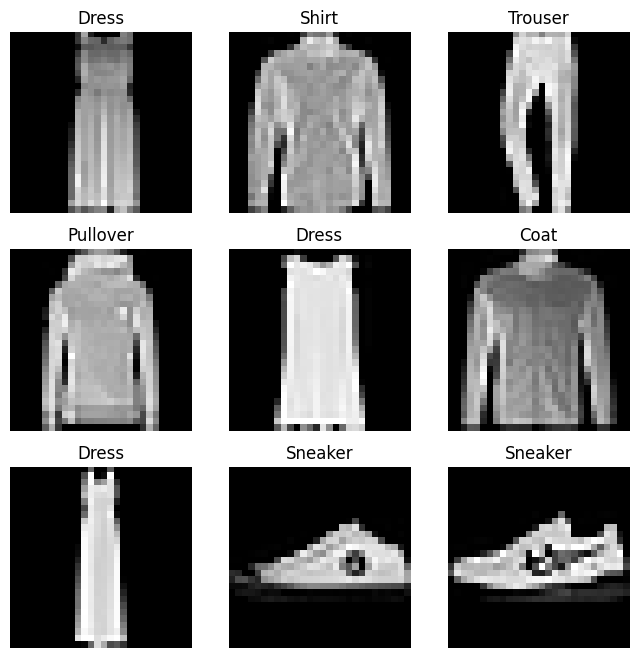

In [75]:
import matplotlib.pyplot as plt
labels_map = {     
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()